# Дообучена модель DistilBERT для многоклассовой классификации <br> Review Text -> Rating, несбалансированность классов учтена весами классов в кросс-энтропии, в качестве метрики качества F1-macro average, чтобы дать всем классам одинаковую важность

# Load and preprocess data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/'Colab Notebooks'/'Machine Learning'/FinTech_NLP/HW1/

 Female_Clothing_Rating_Prediction_unbalanced_classes.ipynb
 Female_Clothing_Recommendation_Prediction.ipynb
 HW1.txt
 womens_clothing_cleaned.csv.zip
 womens_clothing_cleaned_test.csv.zip
'Womens Clothing E-Commerce Reviews.csv.zip'


In [ ]:
!cp /content/drive/MyDrive/'Colab Notebooks'/'Machine Learning'/FinTech_NLP/HW1/'Womens Clothing E-Commerce Reviews.csv.zip' ./

In [ ]:
!unzip  'Womens Clothing E-Commerce Reviews.csv.zip' -d data

Archive:  Womens Clothing E-Commerce Reviews.csv.zip
  inflating: data/Womens Clothing E-Commerce Reviews.csv  


In [ ]:
import pandas as pd
data = pd.read_csv("data/Womens Clothing E-Commerce Reviews.csv", encoding = 'utf8')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data.shape

(23486, 11)

In [ ]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
data["Rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [ ]:
data = data[["Review Text", "Rating"]]
data.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [ ]:
data = data[~data["Review Text"].isnull()]
data.isna().sum()

<Axes: xlabel='Rating', ylabel='count'>

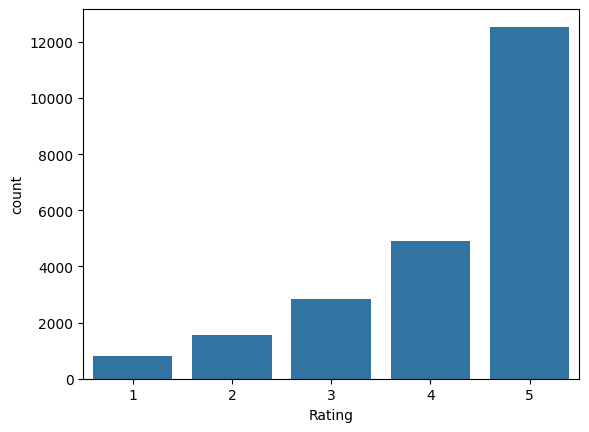

In [ ]:
import seaborn as sns
sns.countplot(data = data, x = "Rating") # unbalanced classes

In [ ]:
# Функция для предобработки текста
import re
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocess_text(text):
    # Приводим текст к нижнему регистру
    text = text.lower()

    # Удаляем никнеймы, хэштеги, URL-адреса и символы новой строки
    text = re.sub(r'@\w+|#[\w-]+|http\S+|\n', '', text)

    # Удаляем пунктуацию, не разделяя слова и знаки препинания
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизируем текст для более точного разделения на слова
    words = nlp(text)

    # Фильтрация слов, состоящих только из подчеркиваний
    processed_words = [word.lemma_ for word in words if not re.match(r'^_+$', word.lemma_)]

    # Соединяем обработанные слова в строку
    return ' '.join(processed_words)

In [ ]:
from tqdm import tqdm
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# (can use `tqdm_gui`, `tqdm_notebook`, optional kwargs, etc.)
tqdm.pandas(desc="Cleaning text: ")
data_cleared = data.copy()
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
data_cleared['Review Text'] = data['Review Text'].progress_map(preprocess_text)
data_cleared.head()

Cleaning rext: 100%|██████████| 22641/22641 [07:52<00:00, 47.89it/s]


,Review Text,Rating
0,absolutely wonderful silky and sexy and comf...,4
1,love this dress its sooo pretty I happen t...,5
2,I have such high hope for this dress and reall...,3
3,I love love love this jumpsuit its fun flirty ...,5
4,this shirt be very flattering to all due to th...,5


In [ ]:
from sklearn.model_selection import train_test_split
data_cleaned_train, data_cleaned_test = train_test_split(data_cleared,  random_state = 17, test_size = 0.2, stratify = data_cleared[["Rating"]])

In [ ]:
# save cleaned data to google drive
data_cleaned_train.to_csv('womens_clothing_cleaned_rating.csv', index=False, header= ["text", "labels"], encoding="utf8", lineterminator="\r\n") # it's crucial to use lineterminator "\r\n"  because of some bag
data_cleaned_test.to_csv('womens_clothing_cleaned_rating_test.csv', index=False, header= ["text", "labels"], encoding="utf8", lineterminator="\r\n") # it's crucial to use lineterminator "\r\n"  because of some bag
!zip womens_clothing_cleaned_rating.csv.zip womens_clothing_cleaned_rating.csv
!zip womens_clothing_cleaned_rating_test.csv.zip womens_clothing_cleaned_rating_test.csv
!cp womens_clothing_cleaned_rating.csv.zip /content/drive/MyDrive/'Colab Notebooks'/'Machine Learning'/FinTech_NLP/HW1/
!cp womens_clothing_cleaned_rating_test.csv.zip /content/drive/MyDrive/'Colab Notebooks'/'Machine Learning'/FinTech_NLP/HW1/

  adding: womens_clothing_cleaned_rating.csv (deflated 67%)
  adding: womens_clothing_cleaned_rating_test.csv (deflated 67%)


#Install libraries and load the cleaned train dataset

In [ ]:
!pip install -U transformers
!pip install -U accelerate # to use Trainer with pytorch
!pip install evaluate # f1 metric
!pip install datasets; # data type to store data for transformers library (like pandas dataframes for scikitlearn)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset # (dataset format for transformers lib) split train/test; feed to learning algorithm; fast fucntion apply - .map()
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding #  to dynamically pad the sentences to the longest length in a batch during collation
# import evaluate # loading metric F1
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer # TrainingArguments and Trainer are helpful instead of using verbose vanilla pytorh training workflow
import numpy as np
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/'Colab Notebooks'/'Machine Learning'/FinTech_NLP/HW1/womens_clothing_cleaned_rating.csv.zip ./
!unzip womens_clothing_cleaned_rating.csv.zip -d data

Mounted at /content/drive
Archive:  womens_clothing_cleaned_rating.csv.zip
  inflating: data/womens_clothing_cleaned_rating.csv  


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
dataset = load_dataset("csv", data_files = 'data/womens_clothing_cleaned_rating.csv')
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 18112
    })
})

In [ ]:
dataset = dataset.map( lambda x : {"labels" : x["labels"] - 1}) # change labels from 0 to 4, required for the function torch.nn.CrossEntropyLoss to work
dataset

Map:   0%|          | 0/18112 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 18112
    })
})

In [ ]:
dataset = dataset['train'].train_test_split(test_size=0.2, )
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 14489
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 3623
    })
})

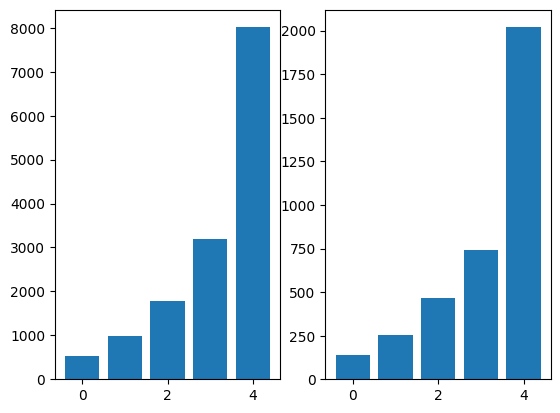

In [ ]:
# checking class balance in train/test split
tr = np.unique(dataset["train"]["labels"], return_counts= True)
ts = np.unique(dataset["test"]["labels"], return_counts= True)
_, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(tr[0], tr[1])
ax2.bar(ts[0], ts[1])
plt.show()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
dataset_tokenized = dataset.map(lambda examples: tokenizer(examples["text"], truncation=True), batched=True) # automatically truncate long sentences to be no longer than DistilBERT’s maximum input length

Map:   0%|          | 0/14489 [00:00<?, ? examples/s]

Map:   0%|          | 0/3623 [00:00<?, ? examples/s]

In [ ]:
dataset_tokenized.set_format(type='torch', device=device)

In [ ]:
# add padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Loading BERT model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5) # automatically adds FFN at the and for classification in two classes
model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

# Set training parameters

In [ ]:
from datasets import load_metric
from sklearn.utils.class_weight import compute_class_weight
#from torch.nn.functional import cross_entropy
import torch
#from sklearn.metrics import log_loss

In [ ]:

class MulticlassTrainer(Trainer):
    # inheriting from Trainer class to override vanilla cross-entropy loss with weighted cross-enthropy loss
    def __init__(self, weights, *args, **kwds):
        super().__init__(*args, **kwds)
        self.weights = weights
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get('logits')
        #loss = cross_entropy(logits.squeeze(), labels.squeeze(), torch.from_numpy(self.weights))
        loss_fct = torch.nn.CrossEntropyLoss(weight=self.weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        #loss = log_loss(labels.squeeze(), logits.squeeze(), sample_weight = self.weights)
        return (loss, outputs) if return_outputs else loss

In [ ]:
f1_metric = load_metric("f1", trust_remote_code=True)
def compute_metrics(eval_pred):
    # using macro f1
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return f1_metric.compute(predictions=predictions, references=labels, average="macro")

In [ ]:
training_args = TrainingArguments(
    #output_dir="./drive/MyDrive/ML/Models/female_clothing_class", # checkpoints are saved here
    output_dir = "./out",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs = 3,
    warmup_steps=500,  # Количество шагов разогрева
    weight_decay=0.01,
    logging_dir="./runs",  # Каталог для логов TensorBoard
    logging_steps=50,  # Логирование каждые 400 шагов
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps = 1500,
    save_total_limit = 10, # max number of model checkpoints to safe
    load_best_model_at_end=True, # automatically loads the best model (save_steps and eval_steps must be multiples oh each other)
    metric_for_best_model="f1",  # Метрика для выбора лучшей модели
    #report_to='tensorboard', # it's also possible to report to weights & biases or other
    greater_is_better=True  # Указывает, что большее значение F1 лучше
)

# weights for unbalanced classes
weights = compute_class_weight(class_weight="balanced", classes=np.unique(dataset_tokenized["train"]["labels"].cpu().numpy()), y=dataset_tokenized["train"]["labels"].cpu().numpy())
WEIGHTS = torch.from_numpy(weights).float().to(device)

trainer = MulticlassTrainer(
    WEIGHTS,
    model=model,
    args=training_args,
    train_dataset=dataset_tokenized["train"],
    eval_dataset=dataset_tokenized["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    #callbacks = [tb]
)

In [ ]:
training_args.device # check the current device

device(type='cpu')

# Train and safe the best model

In [ ]:
trainer.train(resume_from_checkpoint=False)
trainer.save_model("./drive/MyDrive/ML/Models/female_clothing_class_rating") # saves best model

# Load fine-tuned model and test on unseen data

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset # (dataset format for transformers lib) split train/test; feed to learning algorithm; fast fucntion apply - .map()
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification # TrainingArguments and Trainer are helpful instead of using verbose vanilla pytorh training workflow
import numpy as np
import torch

In [ ]:
# load test data
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/'Colab Notebooks'/'Machine Learning'/FinTech_NLP/HW1/womens_clothing_cleaned_rating_test.csv.zip ./
!unzip womens_clothing_cleaned_rating_test.csv.zip -d data
dataset_test = load_dataset("csv", data_files = 'data/womens_clothing_cleaned_rating_test.csv')
dataset_test

Mounted at /content/drive
Archive:  womens_clothing_cleaned_rating_test.csv.zip
  inflating: data/womens_clothing_cleaned_rating_test.csv  


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 4529
    })
})

In [ ]:
dataset_test = dataset_test.map( lambda x : {"labels" : x["labels"] - 1}) # change labels from 0 to 4, required for the function torch.nn.CrossEntropyLoss to work

Map:   0%|          | 0/4529 [00:00<?, ? examples/s]

In [ ]:
# load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/ML/Models/female_clothing_class_rating")
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/ML/Models/female_clothing_class_rating")

In [ ]:
model.config.label2id = {1 : 0, 2 : 1, 3 : 2, 4 : 3, 5 : 4 } # change ids for inference

In [ ]:
dataset_test_tokenized = dataset_test.map(lambda examples: tokenizer(examples["text"], return_tensors="pt")) # automatically truncate long sentences to be no longer than DistilBERT’s maximum input length
dataset_test_tokenized

Map:   0%|          | 0/4529 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 4529
    })
})

In [ ]:
input = dataset_test_tokenized.remove_columns("text")
input.set_format("torch")

In [ ]:
next(iter(input["train"]))

{'labels': tensor(3),
 'input_ids': tensor([[  101,  1045,  2022,  3227,  1037,  2946,  1048,  1998,  2044,  3191,
           3319,  2946,  2091,  1996,  5110,  6741,  2022,  1037,  2210,  1055,
          11231,  2290,  2021,  2023,  2022,  2025,  2019,  3277,  2138,  1997,
           1996,  6058,  6741,  2307,  4377,   102]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
from tqdm import tqdm
y_pred = np.zeros(len(input["train"]), dtype=int)
for i, example in tqdm(enumerate(input["train"]), total=len(input["train"]), desc='Inference'):
  with torch.no_grad():
    logits = model(**example).logits  # passing a dictionary to **kwargs
    y_pred[i] = logits.argmax().item()
y_pred += 1 # rating from 1 to 5
y_test = input["train"]["labels"].numpy() + 1

Inference: 100%|██████████| 4529/4529 [13:04<00:00,  5.77it/s]


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.39      0.42       164
           2       0.30      0.33      0.31       310
           3       0.34      0.51      0.41       565
           4       0.41      0.43      0.42       982
           5       0.87      0.75      0.81      2508

    accuracy                           0.61      4529
   macro avg       0.47      0.48      0.47      4529
weighted avg       0.65      0.61      0.62      4529



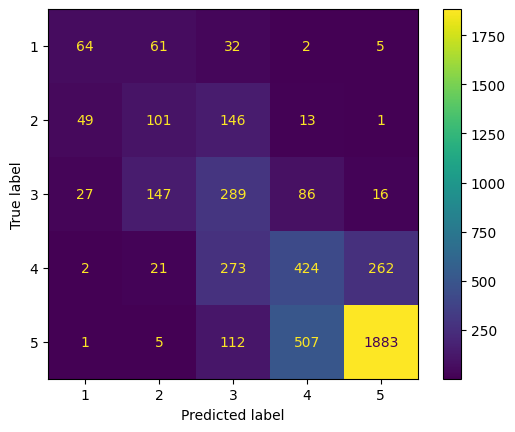

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.arange(1,6))
disp.plot()
plt.show()



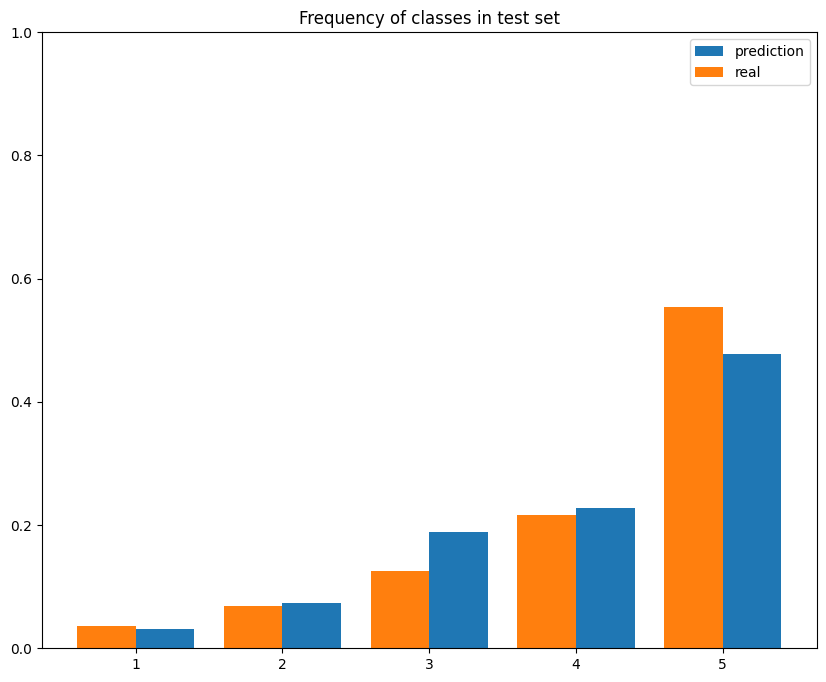

In [ ]:
# bar plot
# estimating frequency of classes using our probabilities (whether the model captures correctly the general population distribution of classes)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

_, freq = np.unique(y_test, return_counts=True)
freq = list(map(lambda x: x / len(y_test),freq)) # frequences of each class in test_set

_, pred_freq = np.unique(y_pred, return_counts=True)
pred_freq= list(map(lambda x: x / len(y_pred),pred_freq)) # frequences of each class in test_set

#pred_freq = pred_prob.mean(axis=0) # estimates of frequences using probability distribution evaluated by the model
plt.figure(figsize=(10, 8))
plt.bar(range(1, 6), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 6), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 1)
plt.legend()
plt.title("Frequency of classes in test set")
plt.show()